In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [7]:
#超参数
input_size = 1
output_size = 1
num_epoch = 60
learing_rate = 0.001

In [3]:
#构建简单数据集
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [4]:
#构建线性模型
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
model = LinearRegression(input_size, output_size)

In [6]:
#定义损失函数和优化函数
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learing_rate)

In [9]:
#训练网络
for epoch in range(num_epoch):
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))
    
    #前向+后向+优化
    optimizer.zero_grad()
    outputs = model(inputs)
    
    #调用损失函熟，计算输出值和真实值之间的差
    loss = criterion(outputs, targets)
    
    #后向传播
    loss.backward()
    
    #调用优化函数开始迭代优化
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [%d/%d], Loss: %.4f' %(epoch+1, num_epoch, loss.data[0]))

Epoch [5/60], Loss: 2.0251
Epoch [10/60], Loss: 0.9537
Epoch [15/60], Loss: 0.5195
Epoch [20/60], Loss: 0.3436
Epoch [25/60], Loss: 0.2722
Epoch [30/60], Loss: 0.2432
Epoch [35/60], Loss: 0.2314
Epoch [40/60], Loss: 0.2265
Epoch [45/60], Loss: 0.2245
Epoch [50/60], Loss: 0.2235
Epoch [55/60], Loss: 0.2231
Epoch [60/60], Loss: 0.2228


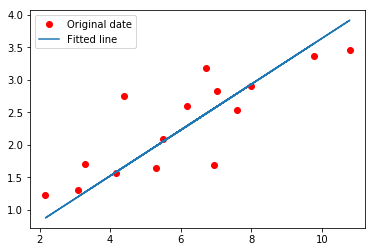

In [10]:
#绘制图
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'ro', label="Original date")
plt.plot(x_train, predicted, label="Fitted line")
plt.legend()
plt.show()

In [11]:
#保存网络
torch.save(model.state_dict(), 'model.pkl')